In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pygwalker as pyg

In [85]:
#Setting plot style
sns.set_style('darkgrid')

In [74]:
#Importing dataset (Daily Activity)
df=pd.read_csv('Daily Activity.csv')
df.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day
0,1503960366,04-12-2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1624580081,04-12-2016,8163,5.31,5.31,0.0,0.00,0.00,5.31,0.0,0,0,146,1294,1432,Tuesday
2,1644430081,04-12-2016,10694,7.77,7.77,0.0,0.14,2.30,5.33,0.0,2,51,256,1131,3199,Tuesday
3,1844505072,04-12-2016,6697,4.43,4.43,0.0,0.00,0.00,4.43,0.0,0,0,339,1101,2030,Tuesday
4,1927972279,04-12-2016,678,0.47,0.47,0.0,0.00,0.00,0.47,0.0,0,0,55,734,2220,Tuesday


In [75]:
#Importing dataset (Sleep Data)
df2=pd.read_csv('Sleep Data.csv')
df2.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,04-12-2016,1,327,346
1,1927972279,04-12-2016,3,750,775
2,2026352035,04-12-2016,1,503,546
3,3977333714,04-12-2016,1,274,469
4,4020332650,04-12-2016,1,501,541


In [73]:
#Importing dataset (Hourly Activity)
df3=pd.read_csv('Hourly Activity.csv')
df3.head()

,Id,Date,Time,StepTotal,TotalIntensity,AverageIntensity,Calories
0,1503960366,4/12/2016,00:00:00,373,20,0.333333,81
1,1503960366,4/12/2016,01:00:00,160,8,0.133333,61
2,1503960366,4/12/2016,02:00:00,151,7,0.116667,59
3,1503960366,4/12/2016,03:00:00,0,0,0.000000,47
4,1503960366,4/12/2016,04:00:00,0,0,0.000000,48


In [77]:
#Renaming column 'SleepDay' to 'ActivityDate'
df2.rename(columns = {'SleepDay':'ActivityDate'}, inplace = True)

In [78]:
#Converting datatype of 'ActivityDate' from 'object' to 'datetime' in df
df['ActivityDate']=pd.to_datetime(df['ActivityDate'])

In [79]:
#Converting datatype of 'ActivityDate' from 'object' to 'datetime' in df2
df2['ActivityDate']=pd.to_datetime(df2['ActivityDate'])

In [80]:
#Merging df and df2
df_combined = pd.merge(df, df2, on = ['Id', 'ActivityDate'], how = 'inner')
df_combined.head()
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 409
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        410 non-null    int64         
 1   ActivityDate              410 non-null    datetime64[ns]
 2   TotalSteps                410 non-null    int64         
 3   TotalDistance             410 non-null    float64       
 4   TrackerDistance           410 non-null    float64       
 5   LoggedActivitiesDistance  410 non-null    float64       
 6   VeryActiveDistance        410 non-null    float64       
 7   ModeratelyActiveDistance  410 non-null    float64       
 8   LightActiveDistance       410 non-null    float64       
 9   SedentaryActiveDistance   410 non-null    float64       
 10  VeryActiveMinutes         410 non-null    int64         
 11  FairlyActiveMinutes       410 non-null    int64         
 12  LightlyActiveMinutes  

# Relationship Between Total Steps and Calories Burned

<Axes: xlabel='TotalSteps', ylabel='Calories'>

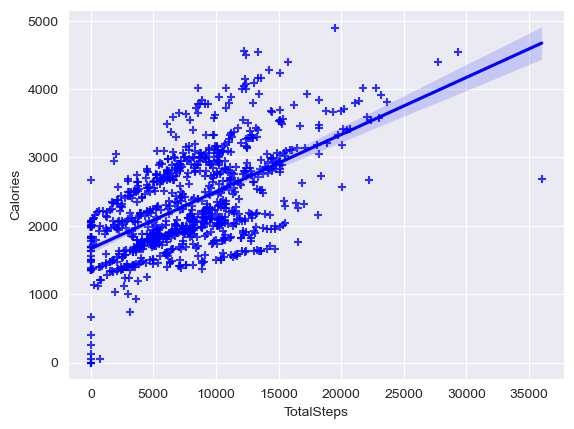

In [86]:
#Plotting scatterplot
sns.regplot(data=df, x='TotalSteps', y='Calories', color='b', marker='+')

 - A **linear relationship** is observed **between 'TotalSteps' and 'Calories,'** as expected.

 - The **regression line's intercept corresponds to the basal metabolic rate**, indicating the **calories burned at rest**.

 - Surprisingly, there are data points with 'Calories' values of 0, which could be considered outliers, as even during periods of inactivity or sleep, some calorie expenditure is expected.

 - To delve deeper, the analysis focuses on data points with 'Calories' values below 1000, as 'Total calories burned' less than 1000 appears unrealistic and warrants investigation.

In [8]:
#Filtering rows having calories lesss than 1000
df[df['Calories'] < 1000]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day
556,2347167796,4/29/2016,42,0.03,0.03,0.0,0.00,0.00,0.03,0.0,0,0,4,2,403,Friday
606,8253242879,4/30/2016,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,0,Saturday
808,7007744171,05-07-2016,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,111,120,Saturday
887,6290855005,05-10-2016,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,0,Tuesday
893,8792009665,05-10-2016,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,48,57,Tuesday
904,3977333714,05-11-2016,746,0.50,0.50,0.0,0.37,0.00,0.13,0.0,4,0,9,13,52,Wednesday
919,1503960366,05-12-2016,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,0,Thursday
921,1844505072,05-12-2016,0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,711,665,Thursday
928,4319703577,05-12-2016,17,0.01,0.01,0.0,0.00,0.00,0.01,0.0,0,0,2,0,257,Thursday
933,5553957443,05-12-2016,3121,2.04,2.04,0.0,0.58,0.40,1.06,0.0,8,6,48,222,741,Thursday


 - When the calorie expenditure falls below 1000, it appears that the smartwatch was worn for a limited duration.

 - Notably, four data points exhibit 1440 minutes of 'SedentaryMinutes,' representing an entire day of inactivity, coupled with zero calories burned. This scenario is implausible since individuals typically do not remain completely sedentary throughout the day.

 - Consequently, it is reasonable to classify these four data points as outliers and proceed to remove them from the data frame.

# Outliers Removal

In [9]:
#Removing outliers based upon condition stated above
outliers = df[df['Calories'] < 1000][df[df['Calories'] < 1000]
                                     ['SedentaryMinutes'] == 1440]
df_dropped = df.drop(outliers.index)

 - Following the removal of outliers, the analysis will primarily focus on the **Basal Metabolic Rate (BMR)**.

 - Additionally, an examination of users who wore the smartwatch throughout the entire day will be conducted.

  - To identify individuals who wore the smartwatch continuously, new columns, namely VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, and SedentaryMinutes, will be introduced.

 - If the sum of these minutes equates to 1440, it is reasonable to infer that the individual wore the smartwatch for the entire day.

# Basic Metabolic Rate

In [10]:
'''
This code is adding a new column called 'UsedAllDay' to two separate DataFrames, 'df'
and 'df_dropped'. The 'UsedAllDay' column is determined based on the sum of minutes spent
in various activity levels, including 'VeryActiveMinutes,' 'FairlyActiveMinutes,'
'LightlyActiveMinutes,' and 'SedentaryMinutes.' If the total sum of these activity
minutes for a particular row is equal to 1440 (which corresponds to a full day of 24 hours),
the 'UsedAllDay' column is set to 'True' for that row; otherwise, it is set to 'False.'
This column helps identify rows where the smartwatch was worn all day.
'''
#Filtering
df['UsedAllDay'] = df[[
    'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
    'SedentaryMinutes'
]].aggregate(np.sum, axis=1) == 1440
df_dropped['UsedAllDay'] = df[[
    'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
    'SedentaryMinutes'
]].aggregate(np.sum, axis=1) == 1440

In [11]:
#Analyzing Statistics
df_bmr = df_dropped[df_dropped['UsedAllDay']][df_dropped[
    df_dropped['UsedAllDay']]['TotalSteps'] == 0]
df_bmr.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,6.900000e+01,69.0,69.0,69.0,69.0,69.0,69.0,69.0,69.0,69.000000,69.0,69.0,69.000000,69.000000
mean,4.751017e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.478261,0.0,0.0,1439.521739,1816.956522
std,2.432003e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.972733,0.0,0.0,3.972733,267.239342
min,1.844505e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1407.000000,1347.000000
25%,1.927972e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1440.000000,1688.000000
50%,4.020333e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1440.000000,1841.000000
75%,6.775889e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1440.000000,2017.000000
max,8.792010e+09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.000000,0.0,0.0,1440.000000,2664.000000


Next, we will gather statistics pertaining to days when no steps were recorded while the smartwatch was worn throughout the entire day.

In [12]:
#Analysing statistics
df_bmr = df_bmr[df_bmr['VeryActiveMinutes'] == 0]
df_bmr.describe()[['TotalSteps', 'SedentaryMinutes', 'Calories']]

,TotalSteps,SedentaryMinutes,Calories
count,68.0,68.0,68.000000
mean,0.0,1440.0,1804.500000
std,0.0,0.0,248.226936
min,0.0,1440.0,1347.000000
25%,0.0,1440.0,1688.000000
50%,0.0,1440.0,1841.000000
75%,0.0,1440.0,1990.000000
max,0.0,1440.0,2064.000000


It appears that there are data points with non-zero values in the VeryActiveMinutes column, despite there being no recorded steps. This anomaly may be due to the nature of the activity being different from typical walking or running. To address this, we will eliminate these data points from our analysis.

In [13]:
#Viewing unique entities
df_bmr.Id.nunique()

12

- We have identified 68 data points suitable for investigating Basal Metabolic Rate (BMR) values, originating from 12 distinct users.
 - **BMR values typically range from 1600 to 1800 for men and around 1550 for women**, according to Holland & Barrett.
 - In our dataset, BMR values span from 1347 to 2064, with a mean value of 1804.5 and a standard deviation of 248.2.
 - The majority of data points used for BMR calculation appear to represent men, but individual physical characteristics can lead to variations in BMR values.

In [15]:
#Splitting dataset
X = df_dropped['TotalSteps'].values.reshape((-1, 1))
y = df_dropped['Calories'].values

In [18]:
#Applying Linear Regression
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

print('Model intercept : {}  \nModel coefficients : {}'.format(
    model.intercept_, model.coef_))

Model intercept : 1689.151000014402  
Model coefficients : [0.08138959]


We might have considered the model's intercept as the BMR value because it aligns with situations where the number of steps taken equals zero. However, the intercept value is lower than the mean BMR value we previously explored, which stood at 1804.5. This discrepancy arises because the dataset used to create the linear regression line encompasses data points where users wore the smartwatch for only a portion of the day. Given that BMR is calculated for an entire day, it's inappropriate to predict this value using such partial data points.

In [19]:
#Apllying it for 'usedallday'
X_all_day = df_dropped[df_dropped.UsedAllDay]['TotalSteps'].values.reshape(
    (-1, 1))
y_all_day = df_dropped[df_dropped.UsedAllDay]['Calories'].values

## Applying Linear Regression

In [20]:
#Applying Linear Regression
model_all_day = LinearRegression()
model_all_day.fit(X_all_day, y_all_day)

print('Model intercept : {}  \nModel coefficients : {}'.format(
    model_all_day.intercept_, model_all_day.coef_))

Model intercept : 1712.6848325918588  
Model coefficients : [0.08111263]


As observed, the intercept value has slightly increased and now appears closer to the previously calculated mean BMR value of 1804.5. However, it still deviates from the expected 1804.5. This discrepancy might be attributed to the fact that the data points used for this analysis come from a more diverse group of individuals. Let's further investigate this.

In [21]:
#Viewing unique entities
df_dropped[df_dropped.UsedAllDay].Id.nunique()

28

Certainly! The data used to fit the linear regression line comprises information from 28 different individuals, whereas the mean BMR value we previously calculated was based on data from only 12 distinct individuals. This discrepancy is one of the factors contributing to the difference between the regression line's intercept (which predicts the BMR value) and the earlier calculated mean BMR value.

Another potential reason for this disparity is that the intensity of activities may not always be directly proportional to the number of steps taken. We observed instances where no steps were recorded, but some time was spent in activities classified as VeryActiveMinutes.Aprt from it, there may be additional factors at play that warrant further investigation.

There are four distinct types of data related to time spent on activities, each with a corresponding set of data related to distance traveled:

 - VeryActiveMinutes and VeryActiveDistance
 - FairlyActiveMinutes and ModeratelyActiveDistance
 - VeryLightlyActiveMinutes and LightActiveDistance
 - SedentaryMinutes and SedentaryActiveDistance
 
We can initiate our exploration by creating four separate regression models, one for each type of activity, to examine their relationships.

# Active Minutes vs Active Distance

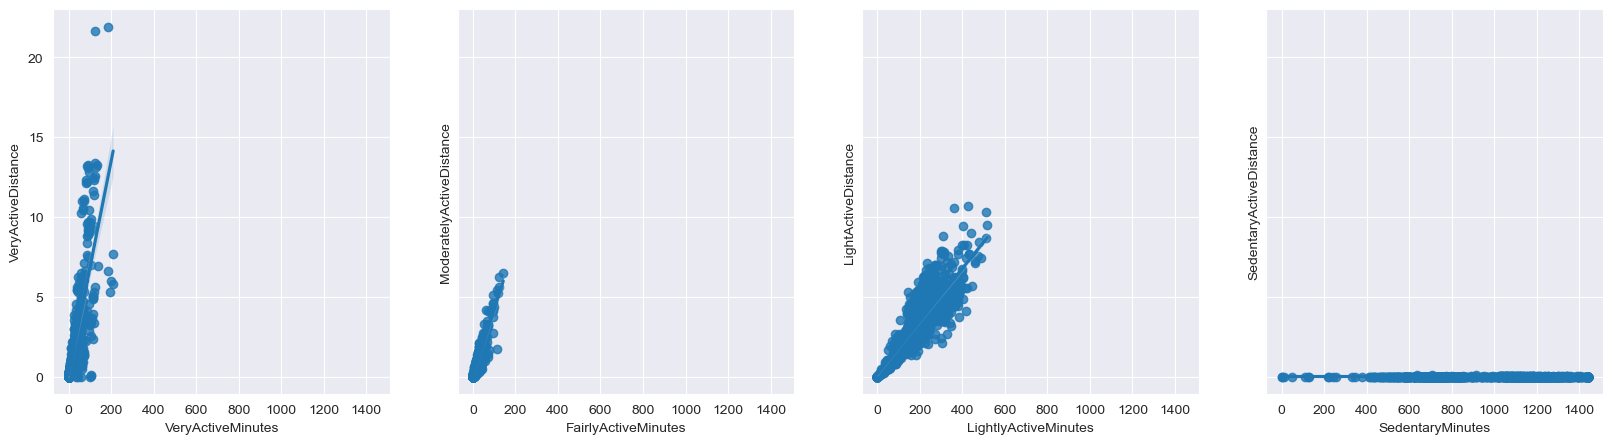

In [87]:
#Plotting different variations of scatter plot
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True, sharex=True)
sns.regplot(data=df_dropped,
            x='VeryActiveMinutes',
            y='VeryActiveDistance',
            ax=axes[0])

sns.regplot(data=df_dropped,
            x='FairlyActiveMinutes',
            y='ModeratelyActiveDistance',
            ax=axes[1])

sns.regplot(data=df_dropped,
            x='LightlyActiveMinutes',
            y='LightActiveDistance',
            ax=axes[2])

sns.regplot(data=df_dropped,
            x='SedentaryMinutes',
            y='SedentaryActiveDistance',
            ax=axes[3]);

It appears that **as the intensity of activity increases, the distance covered in a certain amount of time also tends to increase.** To validate this observation, we can proceed by applying linear regression to each type of activity and then compare the coefficients of the fitted regression lines for further analysis.

## Applying Linear Regression

In [82]:
#Applying Linear Regression to each graph plotted above
def get_model_params(df, x, y):
    X = df[x].values.reshape((-1, 1))
    y = df[y].values
    model = LinearRegression()
    model.fit(X, y)
    return (model.intercept_, model.coef_)

In [83]:
time_spent_types = [
    'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
    'SedentaryMinutes'
]
distance_taken_types = [
    'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
    'SedentaryActiveDistance'
]
for t, d in zip(time_spent_types, distance_taken_types):
    intercept, coef = get_model_params(df_dropped, t, d)
    print('{}/{} : \n {:.3f}'.format(d, t, coef[0]))

VeryActiveDistance/VeryActiveMinutes : 
 0.067
ModeratelyActiveDistance/FairlyActiveMinutes : 
 0.042
LightActiveDistance/LightlyActiveMinutes : 
 0.017
SedentaryActiveDistance/SedentaryMinutes : 
 0.000


 - The average speed for VeryActiveMinutes exceeds that of FairlyActiveMinutes, and the average speed for FairlyActiveMinutes is greater than that for LightlyActiveMinutes, and so on. This demonstrates a clear correlation between the type of activity and the average speed within that category. This observation supports the idea that the **intensity of activities is directly related to the distance covered, as indicated by the number of steps taken.**

 - To further investigate this relationship, we could classify days based on their average speed, creating categories like VeryActiveDay, FairlyActiveDay, LightlyActiveDay, and SedentaryDay. We could then explore how the total number of steps taken in a day relates to the activity type of that day. However, this specific investigation is beyond the scope of our current analysis and is not necessary to support our existing claims.

# Total Sedentary Time on Weekdays and Weekends

We can make an assumption that **people are more inclined to be sedentary during weekdays, considering that many jobs involve sitting at computers on workdays**. Let's verify if this assumption holds true.

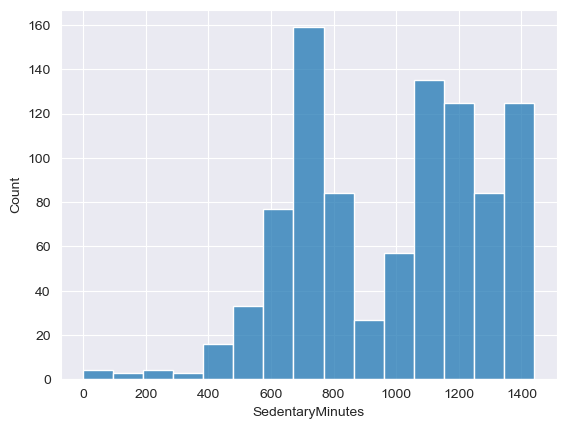

In [88]:
#Histogram plot of sedentary minute logs
sns.histplot(data=df_dropped, x='SedentaryMinutes');

In [92]:
#Creating new column 'IsWeekend'
df_dropped['IsWeekend'] = df_dropped['Day'].isin(['Saturday', 'Sunday'])

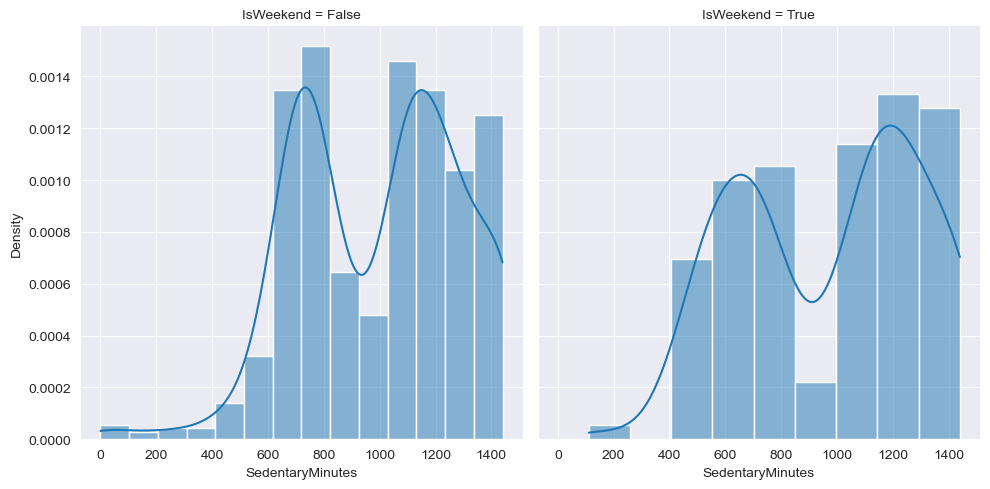

In [94]:
#Plotting sedentaryminute logs for Weekdays and Weekends
g = sns.FacetGrid(df_dropped, col="IsWeekend", height=5, aspect=1)
g.map(sns.histplot, "SedentaryMinutes", kde=True,
      stat='density');

Based on the distribution of log data, it appears that there are two distinct clusters with different peaks. One cluster centers around 600 SedentaryMinutes, while the other is centered around 1250 SedentaryMinutes. We can use this information to group and classify users accordingly.

# Average Sedentary Minutes

In [95]:
avg_sedentary_minutes = pd.DataFrame(
    df_dropped.groupby('Id').aggregate(np.mean)['SedentaryMinutes'])

C:\Users\Mukul\AppData\Local\Temp\ipykernel_20464\1312863308.py:2: FutureWarning: The operation <function mean at 0x000001F60DEB3740> failed on a column. If any error is raised, this will raise an exception in a future version of pandas. Drop these columns to avoid this warning.
  df_dropped.groupby('Id').aggregate(np.mean)['SedentaryMinutes'])


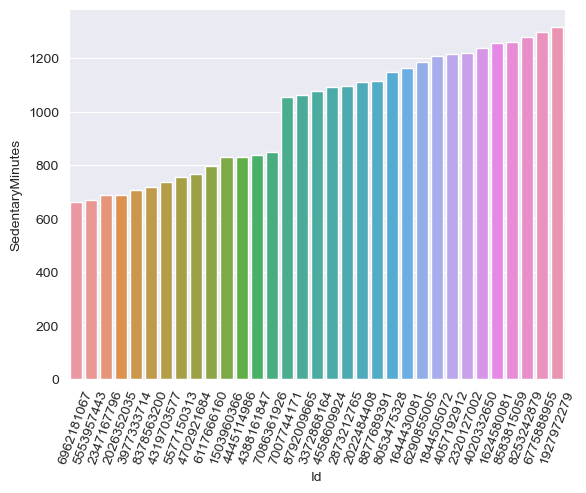

In [96]:
'''
This code creates a bar plot using Seaborn library to visualize the average SedentaryMinutes
for different groups or categories, specified by the 'avg_sedentary_minutes' DataFrame.
It sets the x-axis as the index of 'avg_sedentary_minutes', which represents the categories,
and the y-axis as the 'SedentaryMinutes' column, which holds the average sedentary minutes for
each category. The 'order' parameter ensures that the bars are sorted in ascending order based
on the average SedentaryMinutes. 
'''
#Plotting barplot
sns.barplot(data=avg_sedentary_minutes,
            x=avg_sedentary_minutes.index,
            y='SedentaryMinutes',
            order=avg_sedentary_minutes.sort_values('SedentaryMinutes').index)
plt.xticks(rotation=70);

Certainly, we can observe a significant increase in SedentaryMinutes after the user with Id '7086361926'. This observation suggests a natural division of users into two groups: "LessSedentary" for those before this point and "MoreSedentary" for those after. Another criterion we can consider is the total average SedentaryMinutes for all users. Let's examine this total average and see if it aligns with the division we obtained from the barplot of individual averages.

In [97]:
#Calculating average
total_average = df_dropped['SedentaryMinutes'].aggregate(np.mean)
total_average

989.292735042735

Indeed, dividing users into two groups based on the average SedentaryMinutes aligns with the criterion we observed from the individual averages. We can proceed by adding a new column to categorize users into these two groups.

In [98]:
'''
This code adds a new column named 'MoreSedentary' to the DataFrame 'df_dropped.'
It categorizes users based on their average SedentaryMinutes, comparing it to
the total average. Users with SedentaryMinutes greater than the total average
are marked as 'True' in the 'MoreSedentary' column, while others are marked as 'False.'
'''
#Creating new column with condition
df_dropped['MoreSedentary'] = df_dropped.Id.map(
    (avg_sedentary_minutes > total_average)['SedentaryMinutes'])
df_dropped.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day,UsedAllDay,IsWeekend,MoreSedentary
0,1503960366,04-12-2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,False,False,False
1,1624580081,04-12-2016,8163,5.31,5.31,0.0,0.00,0.00,5.31,0.0,0,0,146,1294,1432,Tuesday,True,False,True
2,1644430081,04-12-2016,10694,7.77,7.77,0.0,0.14,2.30,5.33,0.0,2,51,256,1131,3199,Tuesday,True,False,True
3,1844505072,04-12-2016,6697,4.43,4.43,0.0,0.00,0.00,4.43,0.0,0,0,339,1101,2030,Tuesday,True,False,True
4,1927972279,04-12-2016,678,0.47,0.47,0.0,0.00,0.00,0.47,0.0,0,0,55,734,2220,Tuesday,False,False,True


<Axes: xlabel='MoreSedentary', ylabel='SedentaryMinutes'>

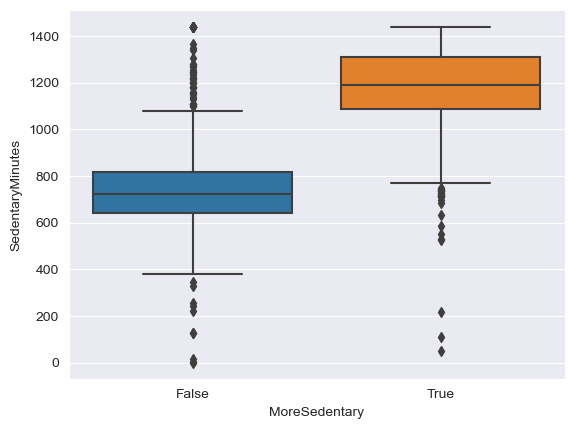

In [99]:
#Creating boxplot
sns.boxplot(x='MoreSedentary', y='SedentaryMinutes', data=df_dropped)

<Axes: xlabel='MoreSedentary', ylabel='SedentaryMinutes'>

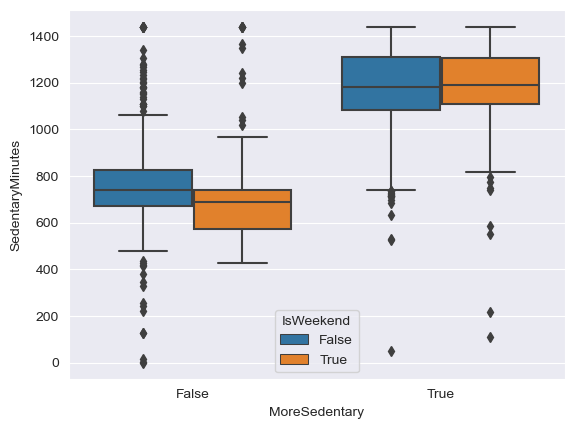

In [100]:
#Plotting boxplot for Weekdays and Weekends
sns.boxplot(x='MoreSedentary',
            y='SedentaryMinutes',
            hue='IsWeekend',
            data=df_dropped)

**There is a noticeable trend among users classified as "less sedentary" where they tend to be more sedentary on weekdays compared to weekends. However, for the "more sedentary" group, the difference in sedentary behavior between weekdays and weekends is not as pronounced.**

# Distribution of Sedentary Minutes Logs for Less Sedentary and More Sedentary Groups

### Less Sendentary Groups

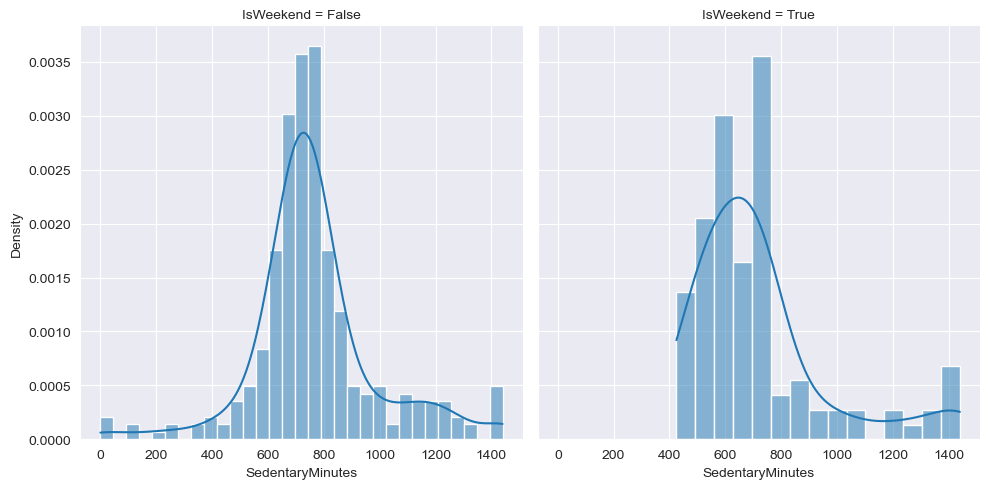

In [101]:
#Plotting histogram 
g = sns.FacetGrid(df_dropped[df_dropped['MoreSedentary'] == 0],
                  col="IsWeekend",
                  height=5,
                  aspect=1)
g.map(sns.histplot, "SedentaryMinutes", kde=True, stat='density');

### More Sendentary Groups

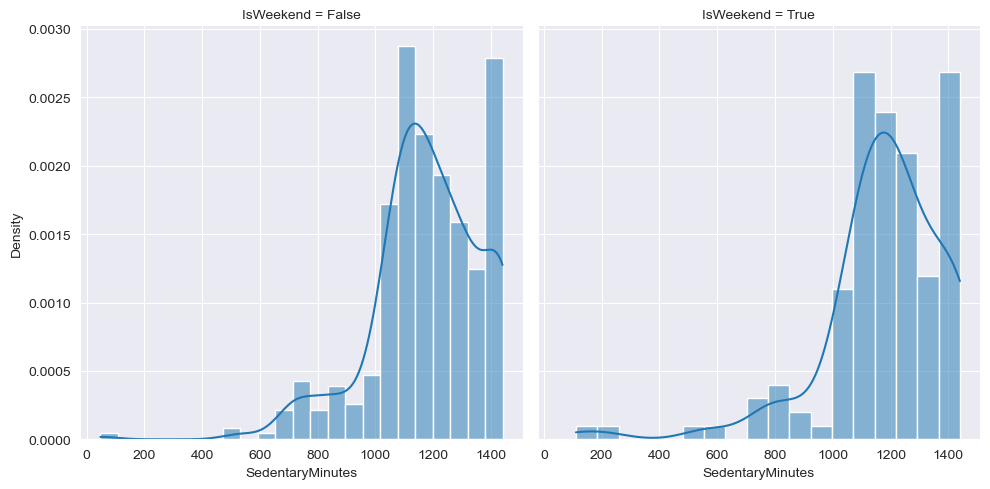

In [102]:
#Plotting histogram
g = sns.FacetGrid(df_dropped[df_dropped['MoreSedentary'] == 1],
                  col="IsWeekend",
                  height=5,
                  aspect=1)
g.map(sns.histplot, "SedentaryMinutes", kde=True, stat='density');

In the case of the "less sedentary" group, the distribution tends to skew towards lower values, affirming our initial assumption that people in this group are indeed more sedentary on weekdays. However, for the "more sedentary" group, the distribution shows less disparity between weekdays and weekends, suggesting that sedentary behavior remains relatively consistent throughout the week for this group.

# Sleeping Habits of Less Sedentary and More Sedentary Groups.

In [104]:
#Creating new column 'More Sedentary'
df2['MoreSedentary'] = df2.Id.map(
    (avg_sedentary_minutes > total_average)['SedentaryMinutes'])
df2.head()

,Id,ActivityDate,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,MoreSedentary
0,1503960366,2016-04-12,1,327,346,False
1,1927972279,2016-04-12,3,750,775,True
2,2026352035,2016-04-12,1,503,546,False
3,3977333714,2016-04-12,1,274,469,False
4,4020332650,2016-04-12,1,501,541,True


Then, we can examine the TotalMinutesAsleep for both sedentary groups.

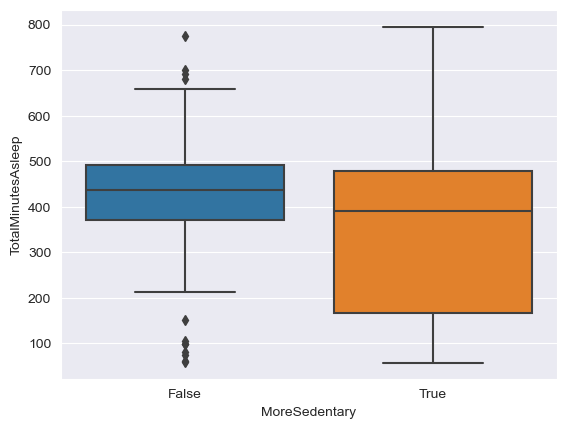

In [106]:
#Plotting boxplot
sns.boxplot(x="MoreSedentary", y="TotalMinutesAsleep", data=df2);

**It appears that the less sedentary group sleeps more on average, which is a reasonable observation.**

# Total Active Minutes vs Total Distance Travelled

In [22]:
from sklearn.preprocessing import PolynomialFeatures

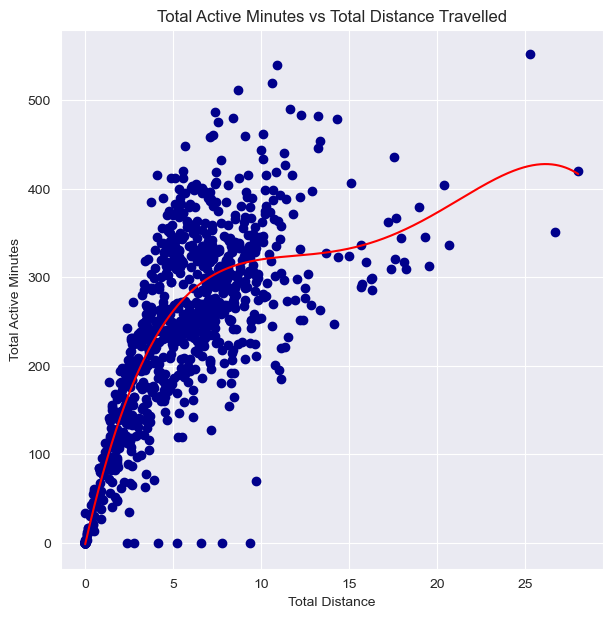

In [149]:
'''
The graph displays the relationship between "Total Distance" and "Total Active Minutes" in a dataset.
Each blue dot represents an observation, while the red curve, generated using Polynomial Regression,
illustrates the best-fitting curve for the data. The graph suggests that as the "Total Distance" traveled
increases, there is a corresponding increase in "Total Active Minutes," indicating a positive correlation
between these two variables.
'''
#Lets also draw a best fitting line / curve through the plot using Linear Regression
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree =5)

lin_reg = LinearRegression()
x = df['TotalDistance'].values.reshape(-1,1)
y =df['TotalActiveMinutes'].values.reshape(-1,1)
X_poly = poly_reg.fit_transform(x)
lin_reg.fit(X_poly,df['TotalActiveMinutes'])
pred = lin_reg.predict(X_poly)

x_grid = np.arange(min(x),max(x),0.01)

plt.figure(figsize = (7,7))
plt.scatter(data = df,x = 'TotalDistance',y = 'TotalActiveMinutes',color = 'darkblue')
plt.plot(x_grid ,lin_reg.predict(poly_reg.fit_transform(x_grid.reshape(-1,1))), color = 'red')
plt.xlabel("Total Distance")
plt.ylabel("Total Active Minutes")
plt.title("Total Active Minutes vs Total Distance Travelled")
plt.show()

We can observe a correlation between Total Active Minutes and Total Distance Traveled, but it's important to note that this relationship isn't purely linear. The data contains outliers that can be explained by activities like running on a treadmill or using a stationary bike. These activities don't involve significant physical distance but can still contribute to active minutes, creating variations in the relationship.

# Daily Calories Burned vs Total Active Minutes

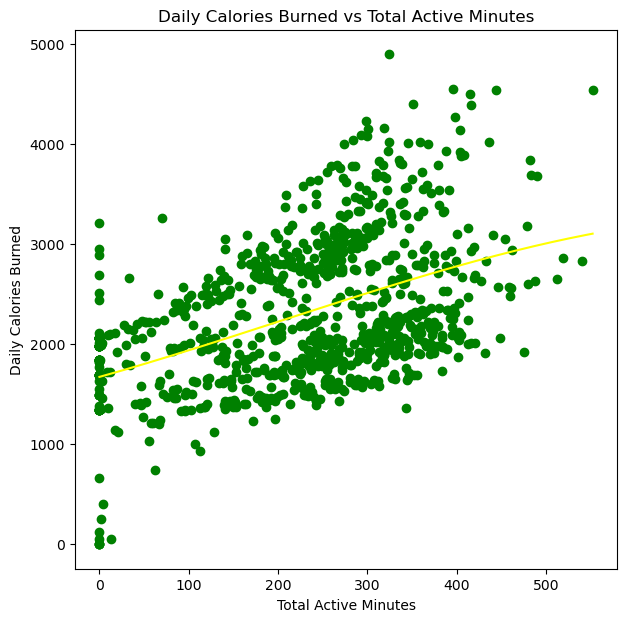

In [24]:
'''
The graph illustrates the relationship between 'Total Active Minutes' and 'Daily Calories Burned' using a dataset.
Each green dot signifies a data point, while the yellow curve, generated via Polynomial Regression (degree=3),
represents the best-fitting curve for the data. The graph suggests that as 'Total Active Minutes' increase, there
is a corresponding increase in 'Daily Calories Burned,' implying a positive correlation between these two variables."
'''
#Lets also draw a best fitting line / curve through the plot using Linear Regression
poly_reg = PolynomialFeatures(degree =3)
x = df['TotalActiveMinutes'].values.reshape(-1,1)
y = df['Calories'].values.reshape(-1,1)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()

lin_reg.fit(X_poly,y)
pred = lin_reg.predict(X_poly)

x_grid = np.arange(min(x),max(x),0.01)

plt.figure(figsize = (7,7))
plt.scatter(data = df,x = 'TotalActiveMinutes',y = 'Calories',color = 'green')
plt.plot(x_grid ,lin_reg.predict(poly_reg.fit_transform(x_grid.reshape(-1,1))), color = 'yellow')
plt.xlabel("Total Active Minutes")
plt.ylabel("Daily Calories Burned")
plt.title("Daily Calories Burned vs Total Active Minutes")
plt.show()

In [23]:
df['TotalActiveMinutes'] = df[['LightlyActiveMinutes','FairlyActiveMinutes','VeryActiveMinutes']].sum(axis = 1)

 - We notice a clear correlation between Daily Calories Burned and Total Active Minutes. Naturally, there should be a baseline level of calorie expenditure even when there are no active minutes. However, we've identified some erroneous data points where daily calories burned are recorded as zero. This is implausible since some calorie expenditure is inevitable throughout the day. Such inaccuracies might stem from users not wearing the fitness band consistently.

 - Furthermore, the positive correlation between Total Steps Taken and Total Distance Traveled is quite evident. Hence, we won't delve into this aspect of the data.

# Total Sleep Received (Minutes) vs Calories Burned

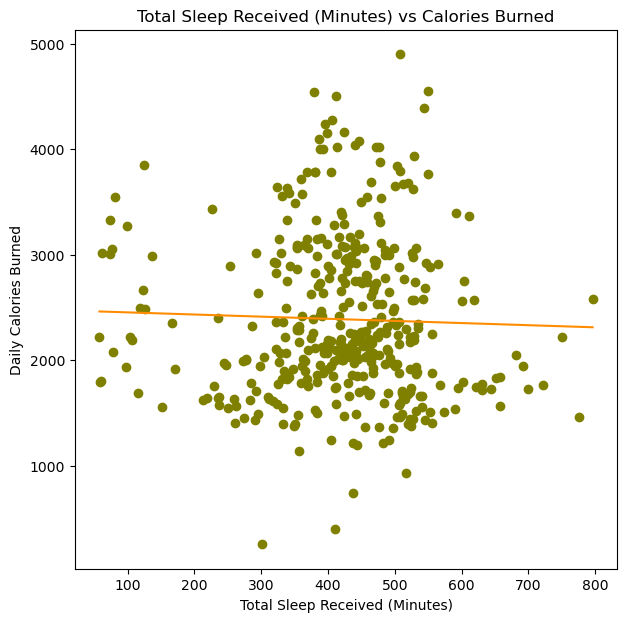

In [56]:
'''
The graph demonstrates the relationship between the 'Total Sleep Received (Minutes)' and 'Daily Calories Burned'
using the combined dataset. Each olive-colored dot represents an individual data point, while the dark orange line,
generated through linear regression, depicts the best-fitting line for the data. The graph suggests that there may
be a correlation between the amount of sleep received and daily calorie expenditure."
'''
#Lets also draw a best fitting line / curve through the plot using Linear Regression
poly_reg = PolynomialFeatures(degree =1)
x = df_combined['TotalMinutesAsleep'].values.reshape(-1,1)
y = df_combined['Calories'].values.reshape(-1,1)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()

lin_reg.fit(X_poly,y)
pred = lin_reg.predict(X_poly)

x_grid = np.arange(min(x),max(x),0.01)

plt.figure(figsize = (7,7))
plt.scatter(data = df_combined,x = 'TotalMinutesAsleep',y = 'Calories',
            color = 'olive')
plt.plot(x_grid ,lin_reg.predict(poly_reg.fit_transform(x_grid.reshape(-1,1))),
         color = 'darkorange')
plt.xlabel("Total Sleep Received (Minutes)")
plt.ylabel("Daily Calories Burned")
plt.title("Total Sleep Received (Minutes) vs Calories Burned")
plt.show()

 - Surprisingly, there isn't a discernible correlation between the amount of sleep and calories burned. However, it's evident that the **majority of users are getting between 300 and 600 minutes (5 to 10 hours) of sleep each day.**

# Total Sleep Received (Minutes) vs Sedentary Minutes

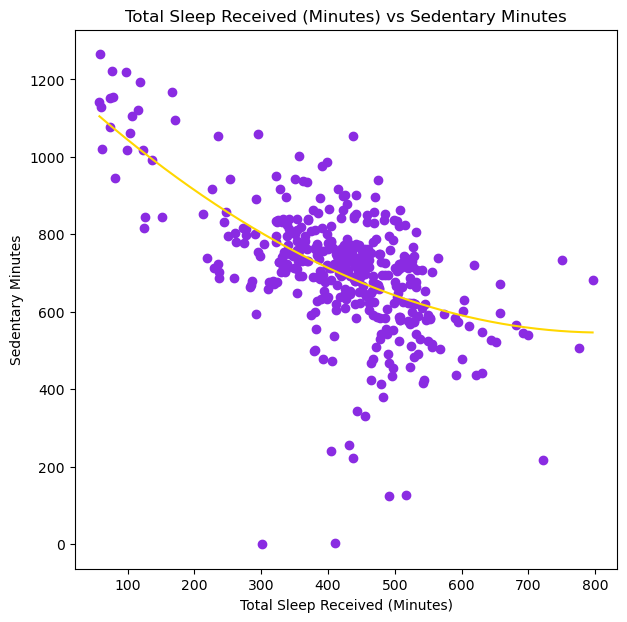

In [57]:
'''
This graph illustrates the relationship between 'Total Sleep Received (Minutes)' and 'Sedentary Minutes' using
the combined dataset. Each blue-violet dot represents an individual data point, while the gold curve, generated
using Polynomial Regression (degree=2), shows the best-fitting curve for the data. The graph suggests a potential
correlation between the amount of sleep received and sedentary behavior, indicating that as sleep duration increases,
sedentary minutes may also increase."
'''
#Lets also draw a best fitting line / curve through the plot using Linear Regression
poly_reg = PolynomialFeatures(degree =2)
x = df_combined['TotalMinutesAsleep'].values.reshape(-1,1)
y =df_combined['SedentaryMinutes'].values.reshape(-1,1)
X_poly = poly_reg.fit_transform(x)
lin_reg = LinearRegression()

lin_reg.fit(X_poly,y)
pred = lin_reg.predict(X_poly)

x_grid = np.arange(min(x),max(x),0.01)

plt.figure(figsize = (7,7))
plt.scatter(data = df_combined,x = 'TotalMinutesAsleep',
            y = 'SedentaryMinutes',color = 'blueviolet')
plt.plot(x_grid ,lin_reg.predict(poly_reg.fit_transform(x_grid.reshape(-1,1))), color = 'gold')
plt.xlabel("Total Sleep Received (Minutes)")
plt.ylabel("Sedentary Minutes")
plt.title("Total Sleep Received (Minutes) vs Sedentary Minutes")
plt.show()

 - We can observe a negative correlation between the amount of sleep received and sedentary minutes. **Users are more likely to have longer periods of sedentary behavior when they don't get enough sleep.**

# Calories vs Steps

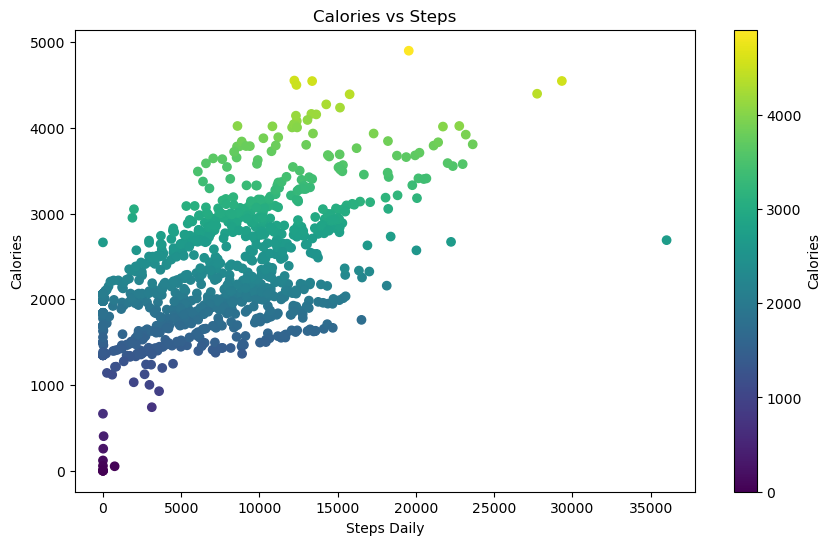

In [25]:
#Plotting scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(df['TotalSteps'], df['Calories'], c=df['Calories'], cmap='viridis')
plt.title("Calories vs Steps")
plt.xlabel("Steps Daily")
plt.ylabel("Calories")
plt.colorbar(label='Calories')
plt.show()

In [28]:
#Importing dataset 'Hourly Activity'
df_hour=pd.read_csv('Hourly Activity.csv')

In [30]:
#Analyzing statistical data for dataset 'df'
df_hour.head()
df_hour.describe()

,Id,StepTotal,TotalIntensity,AverageIntensity,Calories
count,2.209900e+04,22099.000000,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,320.166342,12.035341,0.200589,97.386760
std,2.422500e+09,690.384228,21.133110,0.352219,60.702622
min,1.503960e+09,0.000000,0.000000,0.000000,42.000000
25%,2.320127e+09,0.000000,0.000000,0.000000,63.000000
50%,4.445115e+09,40.000000,3.000000,0.050000,83.000000
75%,6.962181e+09,357.000000,16.000000,0.266667,108.000000
max,8.877689e+09,10554.000000,180.000000,3.000000,948.000000


 - Mean Calories burned is 97, while max is 948 and min is 42. This huge gap could be caused by outliners.
 - Max StepTotal is 10554 while min is only 320, this indicates an intensive training or unsual activity.

# Calories vs Total Intensity vs Step Total 

Text(0.5, 1.0, 'Correlation: Calories vs. TotalIntensity vs. StepTotal')

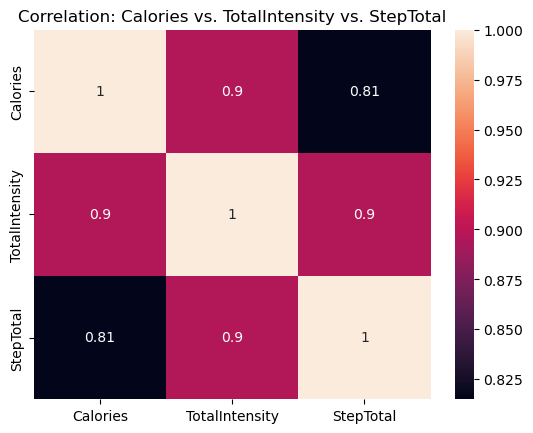

In [34]:
# How calories be affected by ActivityIntensity
hourly_corr = df_hour[['Calories',
                      'TotalIntensity',
                      'StepTotal']].corr()
sns.heatmap(hourly_corr, annot=True)
plt.title('Correlation: Calories vs. TotalIntensity vs. StepTotal')

 - Both Intensity and StepTotal have high positive correlation with Calories (0.81)
 - Total Intensity ranges from 0 to 180. Assume that TotalIntensity from 0 to 60 are low in Intensity Level, 61 to 120 are medium in Intensity Level, and from 121 to 180 are high IntensityLevel.

In [36]:
# Add IntensityLevel
df_hour['IntensityLevel'] = df_hour['TotalIntensity'].apply(lambda x:'low' if x <= 60 else ('medium' if 60 < x <= 120 else 'high'))
df_hour.head()

,Id,Date,Time,StepTotal,TotalIntensity,AverageIntensity,Calories,IntensityLevel
0,1503960366,4/12/2016,00:00:00,373,20,0.333333,81,low
1,1503960366,4/12/2016,01:00:00,160,8,0.133333,61,low
2,1503960366,4/12/2016,02:00:00,151,7,0.116667,59,low
3,1503960366,4/12/2016,03:00:00,0,0,0.000000,47,low
4,1503960366,4/12/2016,04:00:00,0,0,0.000000,48,low


# Calories Burned vs. StepTotal by Intensity Level with Linear Regression

Regression Equation: Calories = 0.071657 * StepTotal + 74.444679
R-Squared = 0.664173


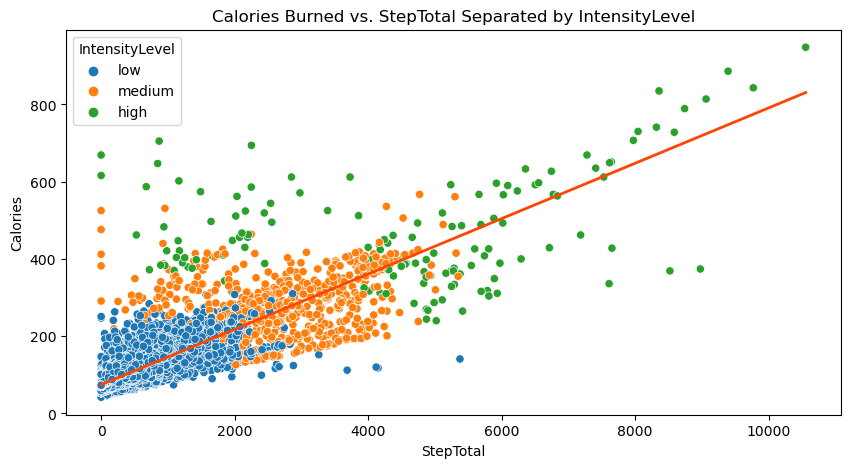

In [41]:
'''
The plot depicts the relationship between "Calories Burned" and "StepTotal" while categorizing data points
by their "IntensityLevel." Additionally, it includes a linear regression trendline (in 'orangered') to show
the best-fit linear relationship between "Calories Burned" and "StepTotal." The printed regression equation
and R-squared value provide insights into the strength of this relationship.
'''
# Plot it on a chart for further visualization
plt.figure(figsize = (10,5))
sns.scatterplot(data=df_hour, x='StepTotal', y='Calories', hue='IntensityLevel')
plt.title('Calories Burned vs. StepTotal Separated by IntensityLevel')

# Add a trendline
slope, intercept = np.polyfit(df_hour['StepTotal'], df_hour['Calories'],1)
x_fit = np.array([min(df_hour['StepTotal']), max(df_hour['StepTotal'])])
y_fit = slope*x_fit + intercept
plt.plot(x_fit, y_fit, color='orangered', linewidth=2)
print(f'Regression Equation: Calories = {slope:2f} * StepTotal + {intercept:2f}')

# Calculate R-squared
MeanCalories = df_hour['Calories'].mean()
residual = df_hour['Calories'] - (slope*df_hour['StepTotal'] + intercept)
SS_res = np.sum(residual**2)
SS_tot = np.sum((df_hour['Calories'] - MeanCalories)**2)
R_squared = 1 - (SS_res/SS_tot)
print(f'R-Squared = {R_squared:2f}')

 - The regression equation demonstrates an R-squared value of 0.66, indicating that 66 percent of the variability in Calories can be explained by a one-step increase in TotalSteps. While the R-squared value isn't exceptionally high, it provides a relatively reliable means of predicting changes in Caloric expenditure. **It's worth noting that walking 10,000 steps daily can result in burning up to 791 Calories.**

 - **Interestingly, there are instances where users burned Calories without taking many additional steps or with minimal step increases. This suggests that users may be engaging in vigorous-intensity exercises such as weightlifting or swimming. Nevertheless, the majority of Calories burned still result from walking (66%), as intensity level tends to rise in tandem with TotalSteps.**

In [150]:
# During what time do users burn the most calories?
# Aggregate data by hour
hourly_sum = df_hour.groupby('Time')['Calories',
                                      'TotalIntensity',
                                      'StepTotal'].mean().reset_index()
hourly_sum.head()

C:\Users\Mukul\AppData\Local\Temp\ipykernel_20464\1466233472.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  hourly_sum = df_hour.groupby('Time')['Calories',


,Time,Calories,TotalIntensity,StepTotal
0,00:00:00,71.805139,2.129550,42.188437
1,01:00:00,70.165059,1.419078,23.102894
2,02:00:00,69.186495,1.043944,17.110397
3,03:00:00,67.538049,0.443730,6.426581
4,04:00:00,68.261803,0.633047,12.699571


# Metrics Variation Over Time

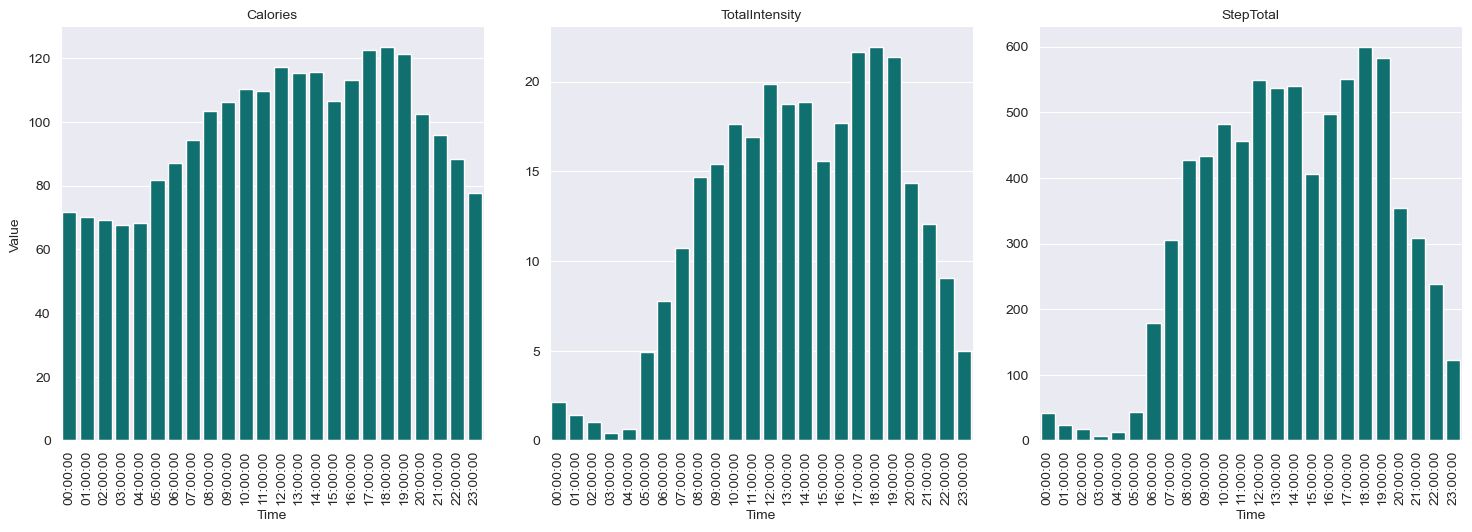

In [108]:
'''
The graph consists of a series of barplots organized in a facet grid format. Each barplot represents
different metrics (Calories, Total Intensity, StepTotal) plotted against time. The vertical bars indicate
the values of these metrics at different time intervals, providing a visual comparison of how they vary
over time. The color 'teal' is used for the bars, and each plot is labeled by its respective metric.
The x-axis represents time, and the y-axis represents the metric's value. The rotation of x-axis labels
(time) facilitates readability.
'''
# Plot it on a chart
# Melt data for better visualization
melted_df = pd.melt(hourly_sum, 
                    id_vars='Time', 
                    value_vars=['Calories','TotalIntensity','StepTotal'],
                    var_name='Metrics',
                    value_name='Value')

# Barplots with facet grid
p = sns.FacetGrid(melted_df, col='Metrics', col_wrap=3, height=5, sharey=False)
p.map_dataframe(sns.barplot, x='Time', y='Value', color='teal')
p.set_titles(col_template='{col_name}')
p.set_axis_labels('Time','Value')
p.set_xticklabels(rotation=90)

 - **The peak of activity occurs between 5 PM and 7 PM, marked by the highest calorie burn, elevated intensity levels, and the most steps taken. **

 - Throughout the day, activity levels gradually increase, **reaching the first peak at noon before tapering off to their lowest point at 3 PM**. Subsequently, activity begins to recover, **reaching another peak at 6 PM, only to drop again to its lowest point at 3 AM.**

 - **Sedentary time typically spans from 11 PM to 6 AM.**

 - **A typical user's day can be visualized as starting work at 6 PM, continuing until midnight, then finishing work at 5 PM, followed by bedtime at 11 PM.**

Key Insights from the Analysis:

1. **Sedentary time significantly affects sleep quality.**
2. Walking 10,000 steps daily can lead to burning up to 791 calories.
3. Exercise patterns are unevenly distributed across the week.
4. Exercise intensity and calories burned are not linearly related, emphasizing the need for a balanced approach.

In [112]:
#Looking at Hourly average statistics
df3[['Calories','TotalIntensity','StepTotal']].mean()

Calories           97.386760
TotalIntensity     12.035341
StepTotal         320.166342
dtype: float64

In [113]:
#creating a new column with hour of the day because it might be useful in the future
df3['Hour'] = pd.to_datetime(df3['Time']).dt.hour
df3.head(4)

,Id,Date,Time,StepTotal,TotalIntensity,AverageIntensity,Calories,Hour
0,1503960366,4/12/2016,00:00:00,373,20,0.333333,81,0
1,1503960366,4/12/2016,01:00:00,160,8,0.133333,61,1
2,1503960366,4/12/2016,02:00:00,151,7,0.116667,59,2
3,1503960366,4/12/2016,03:00:00,0,0,0.000000,47,3


# Hour of the Day vs Calories Burned

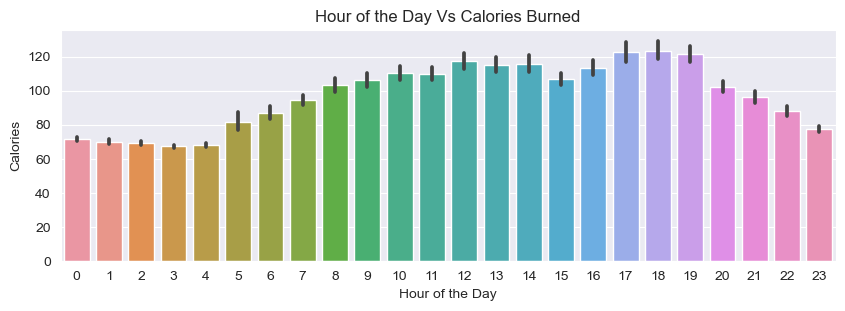

In [114]:
'''
The provided code generates a barplot that illustrates the average calories burned at different hours of the day.
The x-axis represents the "Hour of the Day," while the y-axis represents the "Calories Burned." Each bar on the
plot corresponds to the mean calories burned during a specific hour. The plot visually displays how calorie
expenditure varies throughout the day.
'''
hourlyCalories =df3.groupby(['Hour']).agg({'Calories':'mean'}).reset_index()
plt.figure(figsize = (10,3))
hC = sns.barplot(data = df3,x = 'Hour',y = 'Calories')
hC.set(xlabel='Hour of the Day', ylabel='Calories',title = 'Hour of the Day Vs Calories Burned')
plt.show()

**The majority of calories are burned during daytime hours.**

# Hour of the Day vs Amount of Steps Taken

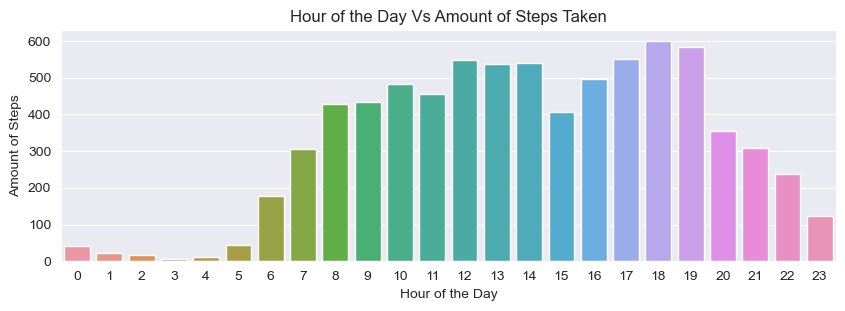

In [115]:
'''
The provided code generates a barplot that visualizes the average number of steps taken at different hours of the day.
The x-axis represents the "Hour of the Day," while the y-axis represents the "Amount of Steps Taken." Each bar on
the plot represents the mean number of steps taken during a specific hour. This graph provides a visual representation
of how step counts vary throughout the day.
'''
hourlySteps = df3.groupby(['Hour']).agg({'StepTotal':'mean'}).reset_index()
plt.figure(figsize = (10,3))
hC = sns.barplot(data = hourlySteps,x = 'Hour',y = 'StepTotal')
hC.set(xlabel='Hour of the Day', ylabel='Amount of Steps',
       title = 'Hour of the Day Vs Amount of Steps Taken')
plt.show()

As expected, **the number of steps taken is significantly lower during the night, while the highest number of steps is recorded during the daytime.**

# Hour of the Day vs Intensity

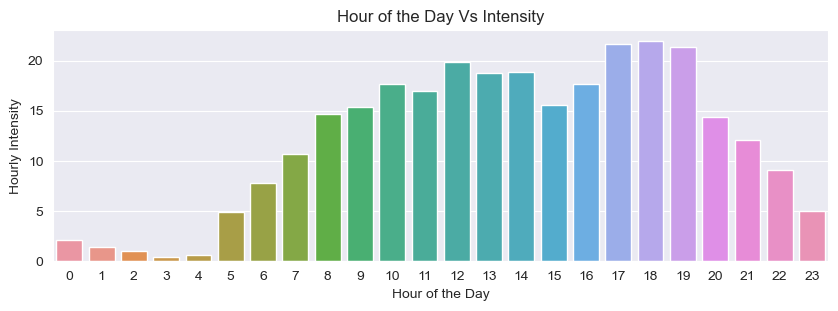

In [116]:
'''
The provided code generates a barplot that illustrates the average hourly intensity level at different hours of
the day. The x-axis represents the "Hour of the Day," while the y-axis represents the "Hourly Intensity."
Each bar on the plot corresponds to the mean intensity level observed during a specific hour. This graph
visually displays how intensity levels vary throughout the day.
'''
hourlyIntensity = df3.groupby(['Hour']).agg({'TotalIntensity':'mean'}).reset_index()
plt.figure(figsize = (10,3))
hC = sns.barplot(data = hourlyIntensity,x = 'Hour',y = 'TotalIntensity')
hC.set(xlabel='Hour of the Day', ylabel='Hourly Intensity',
       title = 'Hour of the Day Vs Intensity')
plt.show()

In [122]:
#Creating new column 'TotalActiveMinutes'
df['TotalActiveMinutes'] = df[['LightlyActiveMinutes',
 'FairlyActiveMinutes','VeryActiveMinutes']].sum(axis = 1)

In [133]:
df_daily=pd.read_csv('Daily Activity.csv')

In [135]:
#Creating new column 'TotalActiveMinutes'
df_daily['TotalActiveMinutes'] = df_daily[['LightlyActiveMinutes',
 'FairlyActiveMinutes','VeryActiveMinutes']].sum(axis = 1)

In [144]:
#Choosing promising variables from the dailyStuff Dataset
dailyStuff_filtered = df_daily[['TotalSteps','TotalDistance','VeryActiveDistance','ModeratelyActiveDistance',
                                 'LightActiveDistance','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes',
                                 'SedentaryMinutes','TotalActiveMinutes','Calories']]
dailyStuff_filtered.head()

,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalActiveMinutes,Calories
0,13162,8.50,1.88,0.55,6.06,25,13,328,728,366,1985
1,8163,5.31,0.00,0.00,5.31,0,0,146,1294,146,1432
2,10694,7.77,0.14,2.30,5.33,2,51,256,1131,309,3199
3,6697,4.43,0.00,0.00,4.43,0,0,339,1101,339,2030
4,678,0.47,0.00,0.00,0.47,0,0,55,734,55,2220


**Insights:**
1. There is a clear positive correlation between activity level and calories burned.
2. **Insufficient sleep negatively impacts productivity.**
3. Users tend to be more active during the daytime.
4. No significant relationship was found between sleep duration and calorie burn.
5. Longer periods of activity are associated with more travel (walking, running, etc.).
6. **Activity levels remain relatively consistent throughout the week, with a slight increase on Saturdays.**
7. When traveling, users are most likely to engage in light activity, followed by very active, and lastly, moderately active.

**Recommendations:**
1. Encourage Bellabeat users to improve sleep quality and duration to reduce sedentary time.
2. Recommend regular exercise, especially for users with sedentary jobs.
3. Collect additional data from Bellabeat users with their consent for more comprehensive analysis.
4. Educate users about the benefits of achieving 10,000 steps per day, as suggested by the CDC, to reduce the risk of injuries and improve overall health.
5. Provide personalized recommendations for daily caloric intake based on activity levels and specific goals (weight loss, weight gain, etc.).